In [6]:
import numpy as np
import pandas as pd

In [30]:
data = pd.read_excel('MOSPP.xlsx')
N, M = list(data.columns[0:2])
data = data.rename (columns = { N: 'Nodo_Inicio',
                                M: 'Nodo_Fin', 
                                'Unnamed: 2': 'Distancia',
                                'Unnamed: 3': 'Emisiones',
                                'Unnamed: 4': 'Riesgo'})

data = data.head(80)

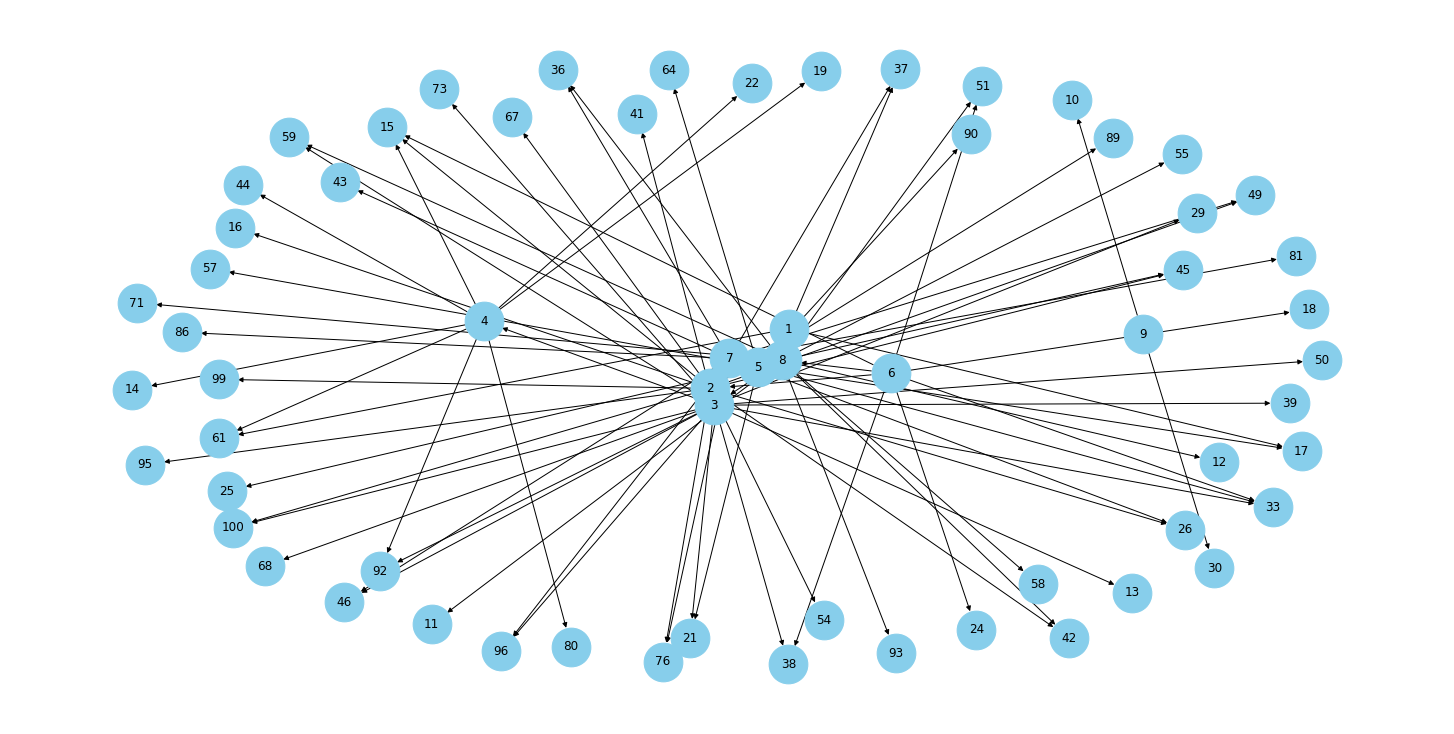

In [31]:
# draw the graph with networkx and matplotlib taking into account the distance and the links between nodes (edges) 

import networkx as nx
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
G = nx.from_pandas_edgelist(data, 'Nodo_Inicio', 'Nodo_Fin', ['Distancia', 'Emisiones', 'Riesgo'], create_using=nx.DiGraph())
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=12)
plt.show()